In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pymongo
import pandas as pd
from pymongo import MongoClient
client = MongoClient()
db = client.AQIdata
collection = db.Realtime
df = pd.DataFrame(list(collection.find()))


In [5]:
df.head()

,_id,city,country,id,lst_update,pollutant_avg,pollutant_id,pollutant_max,pollutant_min,state,station
0,60002c430aa8bb753a28fe23,Aurangabad,India,902,2021-01-13 22:30:00,59.0,PM2.5,86.0,37.0,Maharashtra,"More Chowk Waluj, Aurangabad - MPCB"
1,60002c430aa8bb753a28fe24,Aurangabad,India,903,2021-01-13 22:30:00,82.0,PM10,103.0,62.0,Maharashtra,"More Chowk Waluj, Aurangabad - MPCB"
2,60002c430aa8bb753a28fe25,Aurangabad,India,904,2021-01-13 22:30:00,34.0,NO2,36.0,30.0,Maharashtra,"More Chowk Waluj, Aurangabad - MPCB"
3,60002c430aa8bb753a28fe26,Aurangabad,India,905,2021-01-13 22:30:00,3.0,NH3,3.0,3.0,Maharashtra,"More Chowk Waluj, Aurangabad - MPCB"
4,60002c430aa8bb753a28fe27,Aurangabad,India,906,2021-01-13 22:30:00,19.0,SO2,20.0,18.0,Maharashtra,"More Chowk Waluj, Aurangabad - MPCB"


In [10]:
df.drop(['pollutant_unit'], axis = 1) 

,id,country,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,909,India,Maharashtra,Aurangabad,"More Chowk Waluj, Aurangabad - MPCB",13-01-2021 11:00:00,PM2.5,60,176,92
1,910,India,Maharashtra,Aurangabad,"More Chowk Waluj, Aurangabad - MPCB",13-01-2021 11:00:00,PM10,64,116,91
2,911,India,Maharashtra,Aurangabad,"More Chowk Waluj, Aurangabad - MPCB",13-01-2021 11:00:00,NO2,32,38,34
3,912,India,Maharashtra,Aurangabad,"More Chowk Waluj, Aurangabad - MPCB",13-01-2021 11:00:00,NH3,3,3,3
4,913,India,Maharashtra,Aurangabad,"More Chowk Waluj, Aurangabad - MPCB",13-01-2021 11:00:00,SO2,17,20,19
...,...,...,...,...,...,...,...,...,...,...
95,1004,India,Maharashtra,Mumbai,"Kurla, Mumbai - MPCB",13-01-2021 11:00:00,PM10,NA,NA,NA
96,1005,India,Maharashtra,Mumbai,"Kurla, Mumbai - MPCB",13-01-2021 11:00:00,NO2,NA,NA,NA
97,1006,India,Maharashtra,Mumbai,"Kurla, Mumbai - MPCB",13-01-2021 11:00:00,NH3,NA,NA,NA
98,1007,India,Maharashtra,Mumbai,"Kurla, Mumbai - MPCB",13-01-2021 11:00:00,SO2,NA,NA,NA


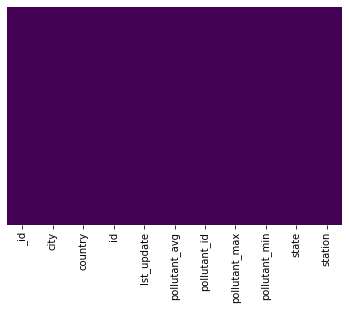

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   _id            231 non-null    object        
 1   city           231 non-null    object        
 2   country        231 non-null    object        
 3   id             231 non-null    int64         
 4   lst_update     231 non-null    datetime64[ns]
 5   pollutant_avg  231 non-null    float64       
 6   pollutant_id   231 non-null    object        
 7   pollutant_max  231 non-null    float64       
 8   pollutant_min  231 non-null    float64       
 9   state          231 non-null    object        
 10  station        231 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 20.0+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   _id            231 non-null    object
 1   city           231 non-null    object
 2   country        231 non-null    object
 3   id             231 non-null    int64 
 4   lst_update     231 non-null    object
 5   pollutant_avg  231 non-null    object
 6   pollutant_id   231 non-null    object
 7   pollutant_max  231 non-null    object
 8   pollutant_min  231 non-null    object
 9   state          231 non-null    object
 10  station        231 non-null    object
 11  AQI            15 non-null     object
dtypes: int64(1), object(11)
memory usage: 21.8+ KB


In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
226    False
227    False
228    False
229    False
230    False
Length: 231, dtype: bool

In [13]:
sum(df.duplicated())

0

In [14]:
df.isnull().sum()

_id              0
city             0
country          0
id               0
lst_update       0
pollutant_avg    0
pollutant_id     0
pollutant_max    0
pollutant_min    0
state            0
station          0
dtype: int64

In [15]:
df.pollutant_id.unique()

array(['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE'], dtype=object)

In [16]:
df['pollutant_avg'].dropna()

0      59.0
1      82.0
2      34.0
3       3.0
4      19.0
       ... 
226    42.0
227     8.0
228    19.0
229    14.0
230    23.0
Name: pollutant_avg, Length: 231, dtype: float64

In [18]:
print("Minimum Avg",df['pollutant_avg'].min())
print("Minimum Avg",df['pollutant_avg'].max())

Minimum Avg 1
Minimum Avg NA


In [17]:
df.pollutant_avg.min()

1.0

In [19]:
df.pollutant_avg.max()

364.0

In [20]:
df.pollutant_avg.fillna(df['pollutant_avg'].mean,inplace=True)

In [21]:
df.pollutant_avg.max()

364.0

In [22]:
print("AVG Pollution_range:",sorted(df['pollutant_avg'].unique()))

AVG Pollution_range: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 63.0, 67.0, 69.0, 70.0, 75.0, 76.0, 80.0, 81.0, 82.0, 84.0, 85.0, 86.0, 87.0, 90.0, 91.0, 92.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 105.0, 107.0, 108.0, 109.0, 110.0, 111.0, 116.0, 118.0, 119.0, 130.0, 133.0, 134.0, 142.0, 147.0, 148.0, 149.0, 154.0, 155.0, 158.0, 161.0, 169.0, 173.0, 179.0, 180.0, 181.0, 183.0, 184.0, 187.0, 190.0, 200.0, 201.0, 208.0, 213.0, 214.0, 217.0, 220.0, 221.0, 229.0, 235.0, 241.0, 249.0, 250.0, 251.0, 258.0, 271.0, 293.0, 364.0]


In [24]:
pd.crosstab(df.city,df.pollutant_id)

pollutant_id,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2
city,,,,,,,
Aurangabad,1,1,1,1,1,1,1
Chandrapur,2,2,2,2,2,2,2
Kalyan,1,1,1,1,1,1,0
Mumbai,21,18,19,20,18,18,18
Nagpur,1,1,1,1,1,1,1
Nashik,1,1,1,1,1,1,1
Navi Mumbai,3,2,3,3,3,3,2
Pune,6,0,4,7,5,5,1
Solapur,0,0,1,1,1,1,1


In [25]:
df['pollutant_id'].unique()

array(['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE'], dtype=object)

In [26]:
df.describe()

,id,pollutant_avg,pollutant_max,pollutant_min
count,231.000000,231.000000,231.000000,231.000000
mean,1024.038961,68.103896,114.623377,31.043290
std,71.391043,70.534528,115.250771,35.852571
min,902.000000,1.000000,1.000000,1.000000
25%,964.000000,16.500000,30.000000,4.000000
50%,1023.000000,42.000000,74.000000,18.000000
75%,1083.500000,95.500000,164.500000,48.000000
max,1150.000000,364.000000,500.000000,178.000000


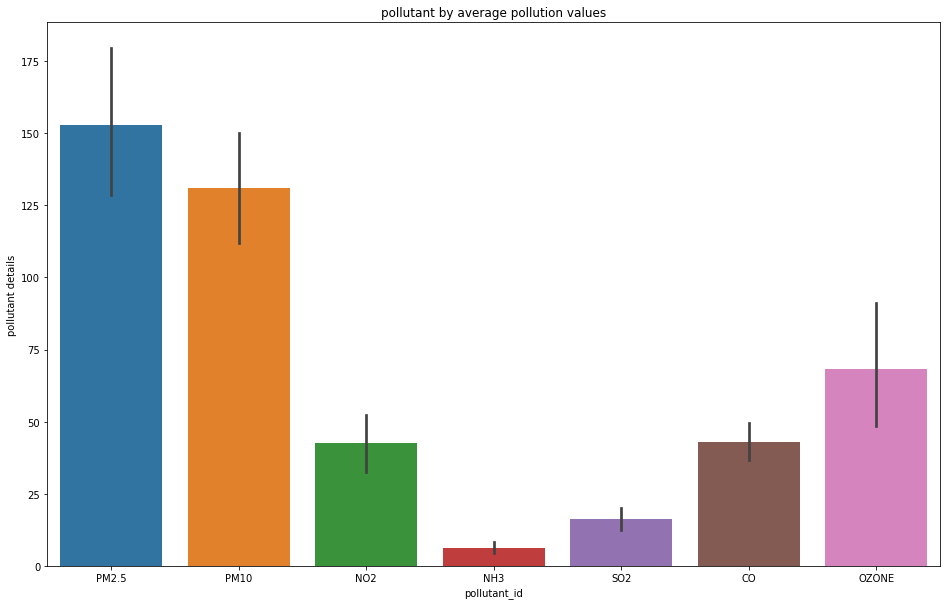

In [27]:
fig, ax = plt.subplots(figsize = (16,10))
ax=sns.barplot(x='pollutant_id',y='pollutant_avg',data=df)
ax.set(ylabel='pollutant details',title='pollutant by average pollution values')
plt.show()

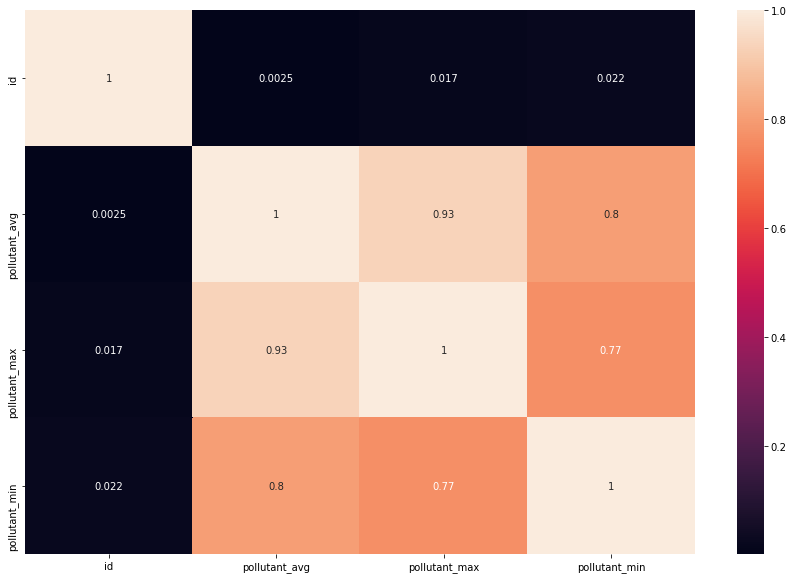

In [28]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [29]:
df.corr()

,id,pollutant_avg,pollutant_max,pollutant_min
id,1.000000,0.002540,0.016538,0.022320
pollutant_avg,0.002540,1.000000,0.934465,0.803173
pollutant_max,0.016538,0.934465,1.000000,0.768584
pollutant_min,0.022320,0.803173,0.768584,1.000000


## Module 2: Exploration data analysis of visualization and training a model by given attributes

In [30]:
df['pollutant_id'].unique()

array(['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE'], dtype=object)

OZONE    16.45
CO       16.02
NO2      14.72
PM10     14.72
PM2.5    14.29
SO2      12.12
NH3      11.69
Name: pollutant_id, dtype: float64

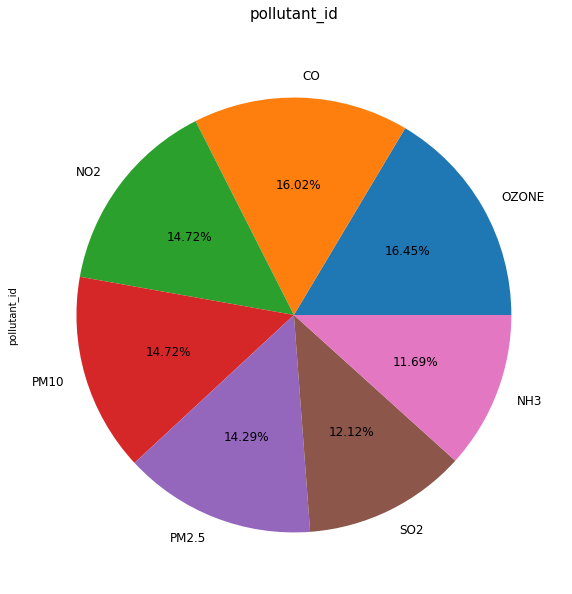

In [36]:
#Prapogation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct = '%1.2f%%', fontsize = 12)
    ax.set_title(variable +'\n', fontsize = 15)
    return np.round(dataframe_pie/df.shape[0]*100,2)
PropByVar(df,'pollutant_id')


Mumbai         57.14
Pune           12.12
Navi Mumbai     8.23
Chandrapur      6.06
Aurangabad      3.03
Nashik          3.03
Nagpur          3.03
Kalyan          2.60
Thane           2.60
Solapur         2.16
Name: city, dtype: float64

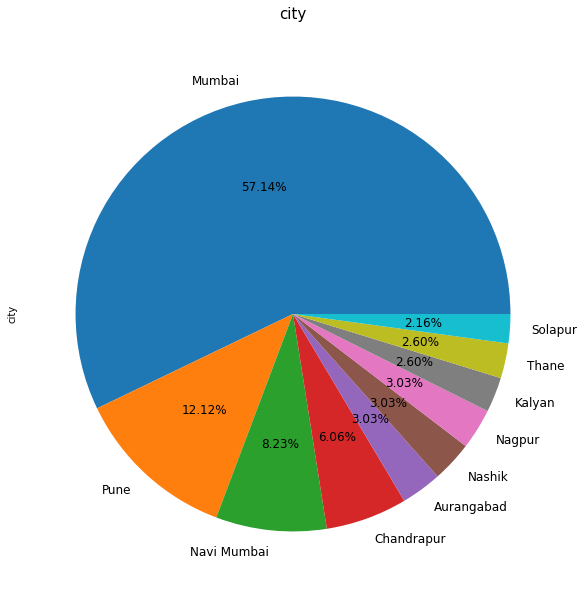

In [37]:
#Prapogation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10),autopct = '%1.2f%%', fontsize = 12)
    ax.set_title(variable + '\n' , fontsize = 15)
    return np.round(dataframe_pie/df.shape[0]*100,2)
PropByVar(df,'city')

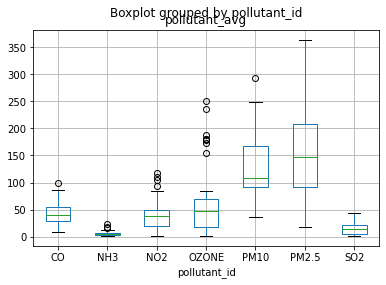

In [39]:
df.boxplot(column = "pollutant_avg", by="pollutant_id")

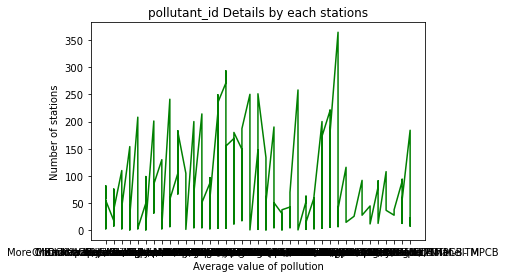

In [43]:
pollutant_avg = df["pollutant_avg"]
pol = df["pollutant_id"]
city = df["city"]
state = df["state"]
st = df["station"]

plt.plot(st, pollutant_avg, color= 'g')
plt.xlabel('Average value of pollution')
plt.ylabel('Number of stations')
plt.title('pollutant_id Details by each stations')
plt.show()

In [45]:
df.columns

Index(['_id', 'city', 'country', 'id', 'lst_update', 'pollutant_avg',
       'pollutant_id', 'pollutant_max', 'pollutant_min', 'state', 'station'],
      dtype='object')

In [49]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['country','state','city','station','lst_update','pollutant_avg','pollutant_max','pollutant_min','pollutant_id']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(str)

In [58]:
df.tail()

,_id,city,country,id,lst_update,pollutant_avg,pollutant_id,pollutant_max,pollutant_min,state,station,AQI
31,60002c430aa8bb753a28fe42,3,0,934,0,25,0,41,0,0,1,NaN
32,60002c430aa8bb753a28fe43,3,0,935,0,3,3,3,1,0,1,NaN
33,60002c430aa8bb753a28fe44,3,0,936,0,47,4,42,43,0,2,NaN
34,60002c430aa8bb753a28fe45,3,0,937,0,0,2,0,0,0,2,NaN
35,60002c430aa8bb753a28fe46,3,0,938,0,19,6,15,18,0,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
226,60002c430aa8bb753a28ff05,9,0,1146,0,40,2,53,23,0,29,NaN
227,60002c430aa8bb753a28ff06,9,0,1147,0,7,1,8,5,0,29,NaN
228,60002c430aa8bb753a28ff07,9,0,1148,0,18,6,49,0,0,29,NaN
229,60002c430aa8bb753a28ff08,9,0,1149,0,13,0,28,4,0,29,NaN


In [56]:
df['AQI'] = df.pollutant_avg.map({'68':'satisfactor','74':'satisfactor','4':'good','39':'good','42':'good','27':'good'})

In [59]:
df.head(100)

,_id,city,country,id,lst_update,pollutant_avg,pollutant_id,pollutant_max,pollutant_min,state,station,AQI
0,60002c430aa8bb753a28fe23,0,0,902,0,55,5,68,34,0,24,NaN
1,60002c430aa8bb753a28fe24,0,0,903,0,66,4,77,51,0,24,NaN
2,60002c430aa8bb753a28fe25,0,0,904,0,32,2,31,28,0,24,NaN
3,60002c430aa8bb753a28fe26,0,0,905,0,2,1,2,2,0,24,NaN
4,60002c430aa8bb753a28fe27,0,0,906,0,18,6,15,17,0,24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95,60002c430aa8bb753a28fe82,3,0,1003,0,124,5,143,54,0,21,NaN
96,60002c430aa8bb753a28fe83,3,0,1004,0,125,4,146,50,0,21,NaN
97,60002c430aa8bb753a28fe84,3,0,1005,0,46,2,78,15,0,21,NaN
98,60002c430aa8bb753a28fe85,3,0,1006,0,3,1,5,2,0,21,NaN


In [ ]:
df['class'] = df.AQI.map({'good':1,'moderate':0,'severe':0,'verypoor':0,'satisfactor':1,'poor':0})

In [63]:
df['pollutant_id']

0      5
1      4
2      2
3      1
4      6
      ..
226    2
227    1
228    6
229    0
230    3
Name: pollutant_id, Length: 231, dtype: object

In [98]:
def AQI_Range(x):
    x=int(x)
    if x<=50:
        return "Good"
    elif x>51 and x<=100:
        return "Moderate"
    elif x>101 and x<=150:
        return "poor"
    elif x>151 and x<=200:
        return "unhealthy"
    elif x>201:
        return "hazardous"

data['AQI'] = df['pollutant_avg'].apply(AQI_Range)
data.head()

,_id,city,country,id,lst_update,pollutant_avg,pollutant_id,pollutant_max,pollutant_min,state,station,AQI
0,60002c430aa8bb753a28fe23,Aurangabad,India,902,2021-01-13 22:30:00,59.0,PM2.5,86.0,37.0,Maharashtra,"More Chowk Waluj, Aurangabad - MPCB",Moderate
1,60002c430aa8bb753a28fe24,Aurangabad,India,903,2021-01-13 22:30:00,82.0,PM10,103.0,62.0,Maharashtra,"More Chowk Waluj, Aurangabad - MPCB",Moderate
2,60002c430aa8bb753a28fe25,Aurangabad,India,904,2021-01-13 22:30:00,34.0,NO2,36.0,30.0,Maharashtra,"More Chowk Waluj, Aurangabad - MPCB",Good
3,60002c430aa8bb753a28fe26,Aurangabad,India,905,2021-01-13 22:30:00,3.0,NH3,3.0,3.0,Maharashtra,"More Chowk Waluj, Aurangabad - MPCB",Good
4,60002c430aa8bb753a28fe27,Aurangabad,India,906,2021-01-13 22:30:00,19.0,SO2,20.0,18.0,Maharashtra,"More Chowk Waluj, Aurangabad - MPCB",Good


In [99]:
df['class'] = df.AQI.replace({'Good':'1','Moderate':'1','poor':'0','Hazardous':'0','Unhealthy':'0'})

In [100]:
df.head()

,_id,city,country,id,lst_update,pollutant_avg,pollutant_id,pollutant_max,pollutant_min,state,station,AQI,class
0,60002c430aa8bb753a28fe23,0,0,902,0,55,5,68,34,0,24,NaN,NaN
1,60002c430aa8bb753a28fe24,0,0,903,0,66,4,77,51,0,24,NaN,NaN
2,60002c430aa8bb753a28fe25,0,0,904,0,32,2,31,28,0,24,NaN,NaN
3,60002c430aa8bb753a28fe26,0,0,905,0,2,1,2,2,0,24,NaN,NaN
4,60002c430aa8bb753a28fe27,0,0,906,0,18,6,15,17,0,24,NaN,NaN


In [83]:
df['class'] = df.AQI.map({'Good':'1','Moderate':'0','Hazardous':'0','Very unhealthy':'0','Unhealthy':1,'Poor':0},na_action='ignore')

In [84]:
df.head()

,_id,city,country,id,lst_update,pollutant_avg,pollutant_id,pollutant_max,pollutant_min,state,station,AQI,class
0,60002c430aa8bb753a28fe23,0,0,902,0,55,5,68,34,0,24,NaN,NaN
1,60002c430aa8bb753a28fe24,0,0,903,0,66,4,77,51,0,24,NaN,NaN
2,60002c430aa8bb753a28fe25,0,0,904,0,32,2,31,28,0,24,NaN,NaN
3,60002c430aa8bb753a28fe26,0,0,905,0,2,1,2,2,0,24,NaN,NaN
4,60002c430aa8bb753a28fe27,0,0,906,0,18,6,15,17,0,24,NaN,NaN


In [ ]:
def qul_No_qul_bar_plot(df,bygroup):
    dataframe_by_Group = p.crosstab(df[bygroup], columns=df["class"], normalize='index')
    dataframe_by_Group = n.round((dataframe_by_Group*100), decimals=2)
    ax= = dataframe_by_Group.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.formt(x) for x in vals]);
    ax.set_xticklabels(dataframe_by_Group.index,rotation = 0, fontsize =15);
    ax.set.title('Air Quality Vs No Air Quality(%) (by' + dataframe_by_Group.index.name +')\n',fontsize = 15)
    ax.set_xlabel(dataframe_by_Group.index.name, fontsize =12)
    ax.set_ylabels('(%)', fontsize =12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize =12)
    rects = ax.patches
    
    #Add Data Labels
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+ rect.get_width()/2,
               height +2,
               str(height)+'%',
               ha='center',
               va='bottom',
               fonsize = 12)
        return dataframe_by_Group
     

In [ ]:
qul_No_qul_bar_plot(df,'pollutant_id')